# [FMA: A Dataset For Music Analysis](https://github.com/mdeff/fma)

## Initial Exploration

### Import libraries and data

In [31]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

import utils

sns.set_context("notebook", font_scale=1.5)
plt.rcParams['figure.figsize'] = (17, 5)

In [32]:
tracks_raw = utils.load('data/fma_metadata/tracks.csv')
genres_raw = utils.load('data/fma_metadata/genres.csv')
features_raw = utils.load('data/fma_metadata/features.csv')
echonest_raw = utils.load('data/fma_metadata/echonest.csv')

np.testing.assert_array_equal(features_raw.index, tracks_raw.index)
assert echonest_raw.index.isin(tracks_raw.index).all()

tracks_raw.shape, genres_raw.shape, features_raw.shape, echonest_raw.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

### Explore tracks and echonest df

In [380]:
tracks_raw.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [381]:
tracks_raw.info()

# there seem to be lot's of Nan values in different columns. 
# In this case: we're mostly interested in the genre related columns from this dataset. 
# We'll explore the propperties table (echonest) before deleting nan values and decing what columns are useful for our ML.

<class 'pandas.core.frame.DataFrame'>
Index: 106574 entries, 2 to 155320
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   (album, comments)            106574 non-null  int64         
 1   (album, date_created)        103045 non-null  datetime64[ns]
 2   (album, date_released)       70294 non-null   datetime64[ns]
 3   (album, engineer)            15295 non-null   object        
 4   (album, favorites)           106574 non-null  int64         
 5   (album, id)                  106574 non-null  int64         
 6   (album, information)         83149 non-null   category      
 7   (album, listens)             106574 non-null  int64         
 8   (album, producer)            18060 non-null   object        
 9   (album, tags)                106574 non-null  object        
 10  (album, title)               105549 non-null  object        
 11  (album, tracks)              10

In [382]:
tracks_raw.head()

album                                                          \
         comments        date_created date_released engineer favorites id   
track_id                                                                    
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4  6   
20              0 2008-11-26 01:45:05    2009-01-06      NaN         2  4   

                                                                           \
                                        information listens producer tags   
track_id                                                                    
2                                           <p></p>    6073      NaN   []   
3                                           <p></p>    6073      NaN   []   
5                                           <p></p>    6073      NaN   []   
10                                              NaN   47632      NaN   []   
20        <p> "spiritual songs" from Nicky Cook</p>    2710      NaN   []   

          ...       track                         \
          ... information interest language_code   
track_id  ...                                      
2         ...         NaN     4656            en   
3         ...         NaN     1470            en   
5         ...         NaN     1933            en   
10        ...         NaN    54881            en   
20        ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [383]:
echonest_raw.head()

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                                ...   
2           0.159310  165.922  0.576661         NaN                NaN  ...   
3           0.461818  126.957  0.269240         NaN                NaN  ...   
5           0.124595  100.260  0.621661         NaN                NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                NaN  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   

                                                     
                                                     
               220       221        222         223  
track_id                                             
2          3.67696   3.61288  13.316690  262.929749  
3          6.08277   6.01864  16.673548  325.581085  
5          5.92649   5.86635  16.013849  356.755737  
10         8.41401   8.33319  21.317064  483.403809  
134       11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

In [384]:
print(echonest_raw.shape)
echonest_raw.columns

# there seem to be lots of columns on this df. 223 columns refer to temporal features. 
echonest_raw['echonest']['temporal_features']

# We probably don't need this. We'll drop them before merging. 


(13129, 249)


,000,001,002,003,004,005,006,007,008,009,...,214,215,216,217,218,219,220,221,222,223
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.877233,0.588911,0.354243,0.295090,0.298413,0.309430,0.304496,0.334579,0.249495,0.259656,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.676960,3.61288,13.316690,262.929749
3,0.534429,0.537414,0.443299,0.390879,0.344573,0.366448,0.419455,0.747766,0.460901,0.392379,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.082770,6.01864,16.673548,325.581085
5,0.548093,0.720192,0.389257,0.344934,0.361300,0.402543,0.434044,0.388137,0.512487,0.525755,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.926490,5.86635,16.013849,356.755737
10,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.414010,8.33319,21.317064,483.403809
134,0.610849,0.569169,0.428494,0.345796,0.376920,0.460590,0.401371,0.449900,0.428946,0.446736,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.267070,11.20267,26.454180,751.147705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124857,0.717013,0.686557,0.411056,0.342718,0.341934,0.482926,0.419219,0.408946,0.393060,0.382778,...,-1.721207,4.686078,0.213789,0.208800,0.007911,0.06395,2.040730,1.97678,8.144532,147.040405
124862,0.673395,0.846995,0.447772,0.425936,0.407817,0.405924,0.290565,0.314019,0.318129,0.310359,...,-0.647897,1.282306,0.214586,0.181860,0.011247,0.06240,0.922360,0.85996,1.794739,6.321268
124863,0.842368,0.719091,0.351503,0.354707,0.314619,0.276266,0.340571,0.342762,0.449963,0.456690,...,-0.771613,1.623510,0.180471,0.128185,0.010103,0.06222,2.251160,2.18894,5.578341,89.180328


In [385]:
echonest_raw.info()
# many columns contain Nan values. Fortunately, they are unlikely the most useful columns for our ML model.
# We'll drop them after merging the data frames. 

<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 2 to 124911
Columns: 249 entries, ('echonest', 'audio_features', 'acousticness') to ('echonest', 'temporal_features', '223')
dtypes: float64(244), object(5)
memory usage: 25.0+ MB


### Merge dataframes

#### Merge tracks & echonest

In [436]:
## MERGE TRACKS AND ECHONEST

#  drop temporal_features columns. 
echonest = echonest_raw.copy()
echonest = echonest['echonest'].drop(columns = 'temporal_features')
tracks = tracks_raw.copy()

# merge tracks and echonest 
tracks_ax = pd.merge(tracks, echonest, left_index=True, right_index=True)
tracks_ax['track'].head()

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,256000,0,NaN,2008-11-26 01:48:14,2008-11-26,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
134,256000,0,NaN,2008-11-26 01:43:19,2008-11-26,207,3,Hip-Hop,[21],[21],NaN,1126,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943,NaN,5,NaN,[],Street Music


In [437]:
# FLATTENING
# we want to flatten the df to work more confortably and merge more info from the genre csv. 
tracks_ax.columns =  tracks_ax.columns.get_level_values(0) + "_" + tracks_ax.columns.get_level_values(1)
tracks_ax.columns = tracks_ax.columns.str.replace('audio_features_', "").str.replace('social_features_', "").str.replace('metadata_', "md_").str.replace('ranks_', "").str.replace('track_genre', "genre")
tracks_ax.columns

Index(['album_comments', 'album_date_created', 'album_date_released',
       'album_engineer', 'album_favorites', 'album_id', 'album_information',
       'album_listens', 'album_producer', 'album_tags', 'album_title',
       'album_tracks', 'album_type', 'artist_active_year_begin',
       'artist_active_year_end', 'artist_associated_labels', 'artist_bio',
       'artist_comments', 'artist_date_created', 'artist_favorites',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_members', 'artist_name', 'artist_related_projects',
       'artist_tags', 'artist_website', 'artist_wikipedia_page', 'set_split',
       'set_subset', 'track_bit_rate', 'track_comments', 'track_composer',
       'track_date_created', 'track_date_recorded', 'track_duration',
       'track_favorites', 'genre_top', 'genres', 'genres_all',
       'track_information', 'track_interest', 'track_language_code',
       'track_license', 'track_listens', 'track_lyricist', 'track_number'

#### Fill genre_top nan

In [438]:
# one of the problems of this df is that "genre_top", which seems the most indicative column for genre, has lots of NaN values.
# We want to find out if the missing info can be obtained from the genres of genres_all columns. 
# We'll compare the values of these columns. 

# first we get the genre_id of genre_top. 
tracks_ax = pd.merge(tracks_ax, genres_raw.reset_index()[['genre_id', 'title']], left_on = ('genre_top'), right_on = ('title'), how='left')

In [439]:
# rename column for clarity: genre_id column to top_genre_id
tracks_ax.columns = tracks_ax.columns.str.replace('genre_id', 'genre_top_id')
tracks_ax = tracks_ax.drop(columns = 'title')
#  and create a new column that says if the top_genre is nan or not (the nan values will be filled in, but these calculated values might be less reliable).
tracks_ax['genre_top_isna'] = tracks_ax['genre_top'].isna()


In [440]:
# now we compare the genre_top_id with different elements of the genres_all and genres columns.
# filter values where the genre_top_id is the same as the first element of genres_all
tracks_ax[tracks_ax['genre_top_id'] == tracks_ax['genres_all'].str[-1]].shape

# this seems to be the best concidence. 
# we'll use it to fill in the nan values of the genre_top column.


tracks_ax['genre_top_id'] = tracks_ax['genre_top_id'].fillna(tracks_ax['genres_all'].str[-1])

# there are no null values now. 
tracks_ax['genre_top_id'].isna().sum()

np.int64(0)

In [441]:
# merge again to calculate the values of genre_top from genre_top_id
tracks_ax = pd.merge(tracks_ax, genres_raw[['title', 'parent', 'top_level']], left_on = ('genre_top_id'), right_index=True, how='left')

#### Get genre_parent and genre_top_level names

In [442]:
# rename columns for clarity: 
tracks_ax = tracks_ax.rename(columns = {'title': 'genre_top_name','parent':'genre_parent_id', 'top_level':'genre_top_level_id'})

In [443]:
# Get GENRE_TOP_LEVEL names 

tracks_ax = pd.merge(tracks_ax, genres_raw[['title']], left_on = ('genre_top_level_id'), right_index=True, how='left')
# rename new columns:
tracks_ax = tracks_ax.rename(columns = {'title':'genre_top_level_name'})

In [444]:
tracks_ax.columns

Index(['album_comments', 'album_date_created', 'album_date_released',
       'album_engineer', 'album_favorites', 'album_id', 'album_information',
       'album_listens', 'album_producer', 'album_tags', 'album_title',
       'album_tracks', 'album_type', 'artist_active_year_begin',
       'artist_active_year_end', 'artist_associated_labels', 'artist_bio',
       'artist_comments', 'artist_date_created', 'artist_favorites',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_members', 'artist_name', 'artist_related_projects',
       'artist_tags', 'artist_website', 'artist_wikipedia_page', 'set_split',
       'set_subset', 'track_bit_rate', 'track_comments', 'track_composer',
       'track_date_created', 'track_date_recorded', 'track_duration',
       'track_favorites', 'genre_top', 'genres', 'genres_all',
       'track_information', 'track_interest', 'track_language_code',
       'track_license', 'track_listens', 'track_lyricist', 'track_number'

### Data cleaning

#### Drop nans

In [445]:
# CLEAN NAN
# drop nan where track_title is nan
tracks_ax = tracks_ax.dropna(subset = ['track_title'])
# clean columns with nan values
tracks_ax.dropna(axis=1, inplace = True)
tracks_ax.isna().sum()

tracks_ax[tracks_ax['artist_name'].str.replace('&', 'and').str.lower() != tracks_ax['md_artist_name'].replace('&', 'and').str.lower()][['artist_name', 'md_artist_name']].head(59)
# there are around 1000 values where the artist name and the md_artist_name are not the same. 
# after a brief exploration, it seems that they are pretty similar (mostly, differences in capitalization, artists that have several names etc). We will drop the md_artist_name column.

# we can drop as well: artist_id, 

tracks_ax = tracks_ax.drop(columns = 'md_artist_name')

In [446]:
tracks_ax.to_csv('data/tracks_fma.csv', index = False)

#### Dtypes

In [447]:
# let's explore types
# select categorial column names
cat_var = tracks_ax.select_dtypes(include="object").columns

In [448]:
tracks_ax[cat_var].head()

# We will drop most of these variables. Before, we can try to calculate some interesting params: 
tracks_ax['album_len'] = tracks_ax['album_title'].str.len()
tracks_ax['artist_len'] = tracks_ax['artist_name'].str.len()
tracks_ax['track_title_len'] = tracks_ax['track_title'].str.len()

# drop categorial columns: 
cat_var_to_drop = cat_var.drop(['genre_top_name', 'genre_top_level_name'])
tracks_ax = tracks_ax.drop(columns = cat_var_to_drop)


In [449]:
# NUMERICAL VARIABLES

num_var = tracks_ax.select_dtypes(exclude="object").columns

# we can drop the id columns and the set columns: 
tracks_ax = tracks_ax.drop(columns = ['album_id', 'artist_id', 'set_subset', 'genre_top_id', 'genre_parent_id', 'genre_top_level_id'])

In [450]:
num_var = tracks_ax.select_dtypes(exclude="object").columns
tracks_ax[num_var].head()

,album_comments,album_favorites,album_listens,album_tracks,artist_comments,artist_favorites,track_bit_rate,track_comments,track_date_created,track_duration,...,valence,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,genre_top_isna,album_len,artist_len,track_title_len
0,0,4,6073,7,0,9,256000,0,2008-11-26 01:48:12,168,...,0.576661,0.388990,0.386740,0.406370,0.000000,0.000000,False,20,4,4
1,0,4,6073,7,0,9,256000,0,2008-11-26 01:48:14,237,...,0.269240,0.388990,0.386740,0.406370,0.000000,0.000000,False,20,4,12
2,0,4,6073,7,0,9,256000,0,2008-11-26 01:48:20,206,...,0.621661,0.388990,0.386740,0.406370,0.000000,0.000000,False,20,4,10
3,0,4,47632,2,3,74,192000,0,2008-11-25 17:49:06,161,...,0.963590,0.557339,0.614272,0.798387,0.005158,0.354516,False,17,9,7
4,0,4,6073,7,0,9,256000,0,2008-11-26 01:43:19,207,...,0.894072,0.388990,0.386740,0.406370,0.000000,0.000000,False,20,4,12


In [451]:
#save the data. This is the df we'll use for our ML model

tracks_ax.to_csv('data/tracks_fma_ml.csv', index = False)

## Modelisation

In [452]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [466]:
# read csv
df = pd.read_csv('data/tracks_fma_ml.csv')

In [467]:
df.columns

Index(['album_comments', 'album_favorites', 'album_listens', 'album_tracks',
       'artist_comments', 'artist_favorites', 'track_bit_rate',
       'track_comments', 'track_date_created', 'track_duration',
       'track_favorites', 'track_interest', 'track_listens', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence', 'artist_discovery',
       'artist_familiarity', 'artist_hotttnesss', 'song_currency',
       'song_hotttnesss', 'genre_top_isna', 'genre_top_name',
       'genre_top_level_name', 'album_len', 'artist_len', 'track_title_len'],
      dtype='object')

In [464]:
# get features. 
numerical_features = df.select_dtypes(exclude="object").columns

# get genre columns (we will use them as target)

genre_columns = ['genre_top_name', 'genre_top_level_name']
# let's set the genre columns as categorical
tracks_ax[genre_columns] = tracks_ax[genre_columns].astype('category')

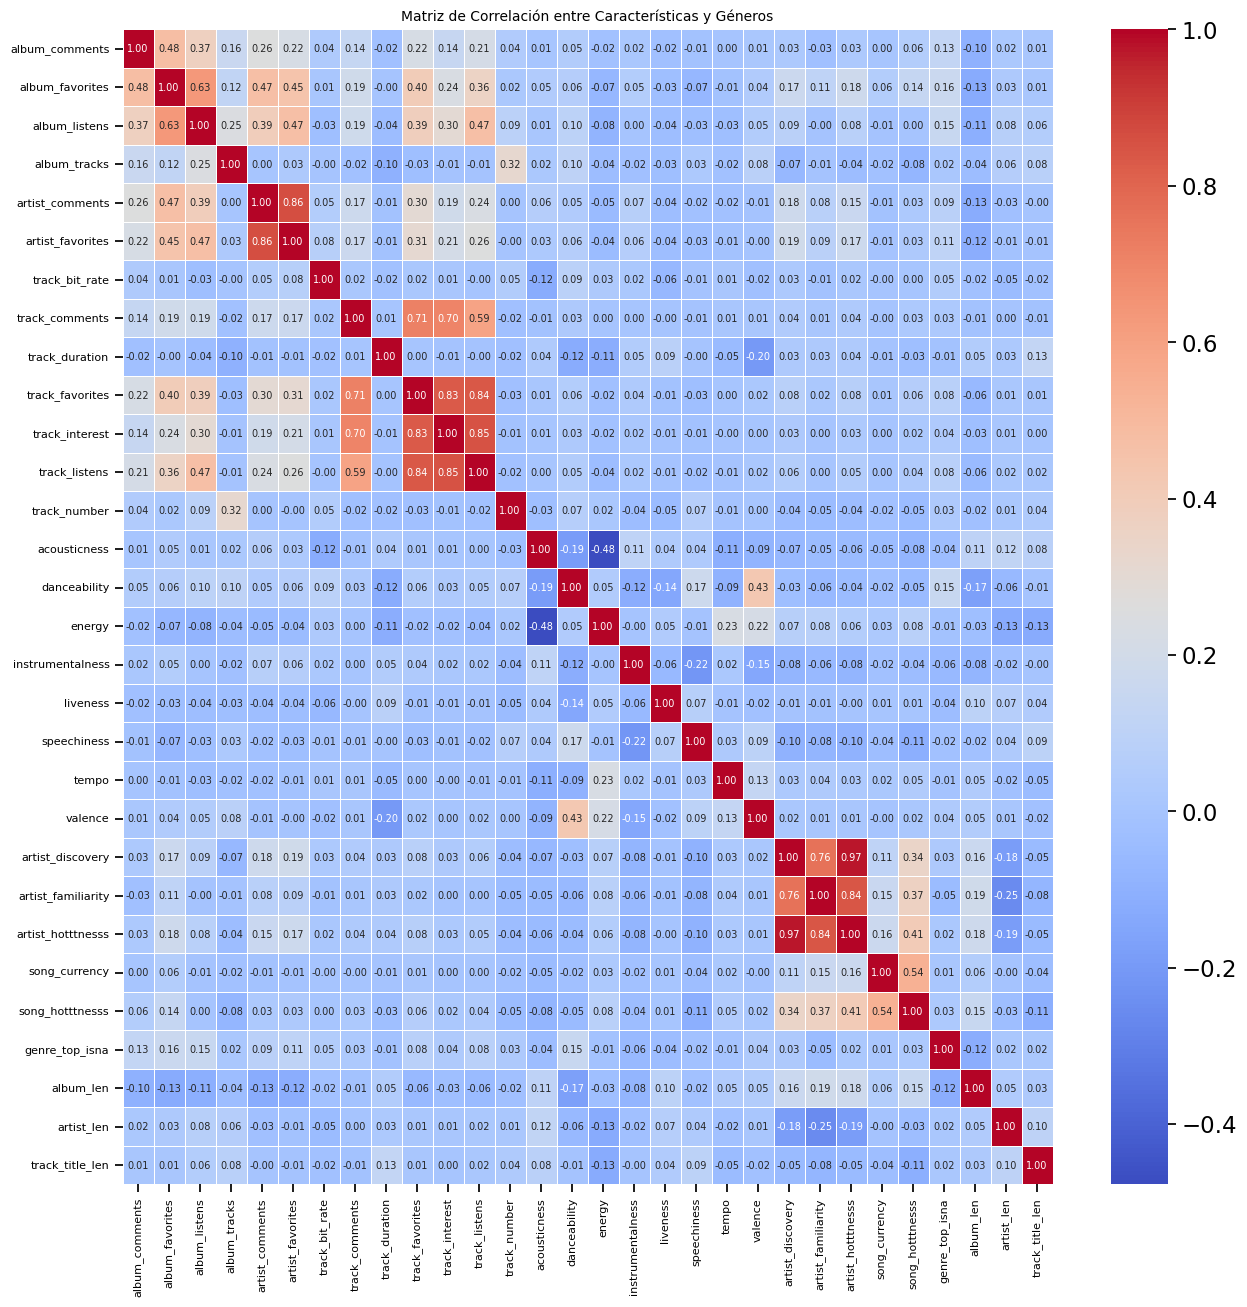

In [426]:
# Crear una matriz de correlación entre columnas numéricas
corr_matrix = df[numerical_features].corr()

# Crear un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True,fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 7})  # "annot_kws" controla el tamaño de las anotaciones
plt.xticks(fontsize=8)  # Cambiar el tamaño de la fuente en las etiquetas del eje X
plt.yticks(fontsize=8)  # Cambiar el tamaño de la fuente en las etiquetas del eje Y
plt.title('Matriz de Correlación entre Características y Géneros', fontsize=10)

plt.show()

In [468]:
# some columns look quite correlated. Especially those that indicate the popularity of album, track and artist. 
# let's keep only some of them. 

tracks_ax = tracks_ax.drop(columns = ['album_favorites', 'artist_favorites', 'track_favorites', 'track_interest', 'artist_discovery', 'artist_familiarity'])

KeyError: "['album_favorites', 'artist_favorites', 'track_favorites', 'track_interest', 'artist_discovery', 'artist_familiarity'] not found in axis"

In [429]:
# let's define our X and y
# X is the numerical features
X = df[numerical_features]

# The target y is the top level genre. 
y = df['genre_top_level_name']

In [430]:
# divide test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [431]:
# normalise X

# Escale numeric variables
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [432]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train_sc, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test_sc)

# Evaluar la precisión del modelo

print(f"Precisión del modelo Random Forest: {accuracy_score(y_test, y_pred):.4f}")

print(classification_report(y_test, y_pred))

Precisión del modelo Random Forest: 0.8027
                     precision    recall  f1-score   support

              Blues       1.00      0.33      0.50        18
          Classical       0.87      0.96      0.91        72
            Country       0.92      0.73      0.81        30
     Easy Listening       1.00      0.50      0.67        10
         Electronic       0.81      0.85      0.83       724
       Experimental       0.93      0.52      0.67        48
               Folk       0.90      0.64      0.75       195
            Hip-Hop       0.93      0.72      0.81       193
       Instrumental       1.00      0.76      0.86        29
      International       0.92      0.67      0.78        70
               Jazz       1.00      0.46      0.63        69
Old-Time / Historic       1.00      0.41      0.58        61
                Pop       0.97      0.28      0.43       105
               Rock       0.74      0.96      0.83       967
           Soul-RnB       1.00      0.61 

In [435]:

# Evaluar la precisión del modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Random Forest: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Precisión del modelo Random Forest: 0.8027
                     precision    recall  f1-score   support

              Blues       1.00      0.33      0.50        18
          Classical       0.87      0.96      0.91        72
            Country       0.92      0.73      0.81        30
     Easy Listening       1.00      0.50      0.67        10
         Electronic       0.81      0.85      0.83       724
       Experimental       0.93      0.52      0.67        48
               Folk       0.90      0.64      0.75       195
            Hip-Hop       0.93      0.72      0.81       193
       Instrumental       1.00      0.76      0.86        29
      International       0.92      0.67      0.78        70
               Jazz       1.00      0.46      0.63        69
Old-Time / Historic       1.00      0.41      0.58        61
                Pop       0.97      0.28      0.43       105
               Rock       0.74      0.96      0.83       967
           Soul-RnB       1.00      0.61 

In [ ]:
# Oversampling
